## PROJECT: Analysis on ML Test Scores

This analysis assumes the dataset represents scores from a structured learning environment from 3 different batches. Each student secured a score out of 7, representing their performance on an open ended ML problem.

The objective of this analysis is to perform Expolatory Data Analysis (EDA) to understand batch wise performance patterns, score distribution, variability and failure structures. Rather than focusing on only on avergae score, the analysis aims to identify systemic strengths and weeknesses aacross batches,evaluate learning consistency and uncover hidden patterns suchs performance floors, outlier driven success and learning phase transition.

The insights driven from it are futureprrofed for Ml modelling.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **1. Import Libraries**

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# **2. Load the data set**

In [3]:
df = pd.read_csv("/content/drive/MyDrive/scores_data.csv")

# **3. Initial data inspection**

In [5]:
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [6]:
df.tail()

,Batch,User_ID,Score
144,AI_ELITE_4,uid_5,4 / 7
145,AI_ELITE_4,uid_4,4 / 7
146,AI_ELITE_4,uid_3,4 / 7
147,AI_ELITE_4,uid_2,3 / 7
148,AI_ELITE_4,uid_1,2 / 7


In [7]:
df.shape

(149, 3)

In [8]:
df.columns

Index(['Batch ', 'User_ID ', '   Score   '], dtype='object')

In [9]:
df.columns = df.columns.str.strip() ## clean column names

In [11]:
print(df.columns)

Index(['Batch', 'User_ID', 'Score'], dtype='object')


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Batch    149 non-null    object
 1   User_ID  149 non-null    object
 2   Score    149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [29]:
df.describe(include='all')

,Batch,User_ID,Score,Score_num,Performance_Level
count,149,149,149,149.000000,149
unique,3,149,8,NaN,3
top,AI_ELITE_7,uid_149,4 / 7,NaN,High
freq,53,1,40,NaN,68
mean,NaN,NaN,NaN,4.382550,NaN
std,NaN,NaN,NaN,1.592199,NaN
min,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,NaN,3.000000,NaN
50%,NaN,NaN,NaN,4.000000,NaN
75%,NaN,NaN,NaN,5.000000,NaN


In [16]:
df['Score_num'] = df['Score'].str.extract(r'(\d+)').astype(int) ## Convert scores to numeric
df.head()


,Batch,User_ID,Score,Score_num
0,AI_ELITE_7,uid_149,6 / 7,6
1,AI_ELITE_7,uid_148,6 / 7,6
2,AI_ELITE_7,uid_147,7 / 7,7
3,AI_ELITE_7,uid_146,7 / 7,7
4,AI_ELITE_7,uid_145,4 / 7,4


# **3. Univariate analysis (Overall score behavior)**

In [17]:
df['Score_num'].describe()


,Score_num
count,149.000000
mean,4.382550
std,1.592199
min,0.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,7.000000


# **4. Batch wise performance analysis**

In [18]:
batch_summary = (
    df.groupby('Batch')['Score_num']
      .agg(
          students='count',
          mean_score='mean',
          median_score='median',
          min_score='min',
          max_score='max',
          std_dev='std'
      )
      .round(2)
)

batch_summary


,students,mean_score,median_score,min_score,max_score,std_dev
Batch,,,,,,
AI_ELITE_4,48,3.79,4.0,0,7,1.44
AI_ELITE_6,48,4.23,4.0,0,7,1.64
AI_ELITE_7,53,5.06,5.0,2,7,1.45


# **5. Batch wise score distribution**

In [19]:
score_dist = pd.crosstab(df['Batch'], df['Score_num'])
score_dist


Score_num,0,1,2,3,4,5,6,7
Batch,,,,,,,,
AI_ELITE_4,1,1,7,8,19,8,1,3
AI_ELITE_6,1,2,3,9,11,13,4,5
AI_ELITE_7,0,0,2,7,10,11,13,10


<Figure size 640x480 with 0 Axes>

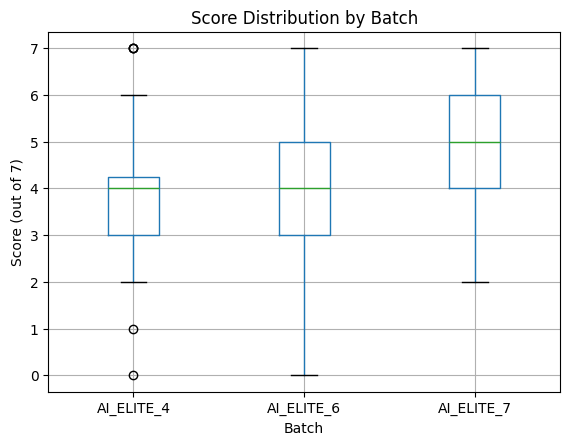

In [20]:
plt.figure()
df.boxplot(column='Score_num', by='Batch')
plt.title('Score Distribution by Batch')
plt.suptitle('')
plt.xlabel('Batch')
plt.ylabel('Score (out of 7)')
plt.show()


# **6. Performance Floor Analysis**

In [24]:
df.groupby('Batch')['Score_num'].min()

,Score_num
Batch,
AI_ELITE_4,0
AI_ELITE_6,0
AI_ELITE_7,2


# **7. Performance level segmentation**

In [22]:
def performance_label(score):
    if score <= 2:
        return 'Low'
    elif score <= 4:
        return 'Medium'
    else:
        return 'High'

df['Performance_Level'] = df['Score_num'].apply(performance_label)
df.head()


,Batch,User_ID,Score,Score_num,Performance_Level
0,AI_ELITE_7,uid_149,6 / 7,6,High
1,AI_ELITE_7,uid_148,6 / 7,6,High
2,AI_ELITE_7,uid_147,7 / 7,7,High
3,AI_ELITE_7,uid_146,7 / 7,7,High
4,AI_ELITE_7,uid_145,4 / 7,4,Medium


# **8.Batch vs Performance Level**

In [23]:
pd.crosstab(df['Batch'], df['Performance_Level'])


Performance_Level,High,Low,Medium
Batch,,,
AI_ELITE_4,12,9,27
AI_ELITE_6,22,6,20
AI_ELITE_7,34,2,17


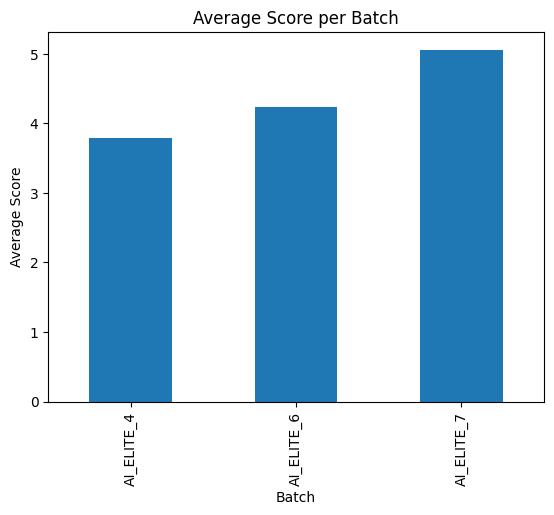

In [25]:
batch_summary['mean_score'].plot(kind='bar')
plt.title('Average Score per Batch')
plt.xlabel('Batch')
plt.ylabel('Average Score')
plt.show()


In [26]:
print("""
INSIGHTS:

1. Scores range from 0 to 7, indicating wide variation in student understanding.
   The presence of very low scores suggests potential learning gaps.

2. Batch-wise performance:
   - AI_ELITE_7 has the highest mean and median, making it the strongest batch.
   - AI_ELITE_6 shows the highest variability, indicating mixed performance.
   - AI_ELITE_4 has the lowest mean, reflecting foundational weaknesses.

3. Score distribution patterns:
   - AI_ELITE_4 scores cluster around 3–4.
   - AI_ELITE_6 spans the entire range from 0 to 7.
   - AI_ELITE_7 clusters around 5–7.
   This progression indicates increasing learning maturity across batches.

4. Performance floor analysis:
   - AI_ELITE_7 has a minimum score of 2.
   - Other batches drop to 0.
   This suggests system-level protection against failure rather than reliance on individual excellence.
""")



INSIGHTS:

1. Scores range from 0 to 7, indicating wide variation in student understanding.
   The presence of very low scores suggests potential learning gaps.

2. Batch-wise performance:
   - AI_ELITE_7 has the highest mean and median, making it the strongest batch.
   - AI_ELITE_6 shows the highest variability, indicating mixed performance.
   - AI_ELITE_4 has the lowest mean, reflecting foundational weaknesses.

3. Score distribution patterns:
   - AI_ELITE_4 scores cluster around 3–4.
   - AI_ELITE_6 spans the entire range from 0 to 7.
   - AI_ELITE_7 clusters around 5–7.
   This progression indicates increasing learning maturity across batches.

4. Performance floor analysis:
   - AI_ELITE_7 has a minimum score of 2.
   - Other batches drop to 0.
   This suggests system-level protection against failure rather than reliance on individual excellence.



My EDA revealed that performance differences across batches and not individual brilliance. They are primarily system-driven rather than individual-driven. AI_ELITE_7 demonstrates a strong learning floor and consistent outcomes, AI_ELITE_6 represents a transitional phase with high variance, and AI_ELITE_4 shows systemic foundational gaps. This indicates that improving minimum performance and batch-level structure will yield greater impact than focusing only on top scorers.